#Drug Response Prediction ML Modeling
In this assignment, I was given a dataset (drug.csv) containing a set of patients with the same illness. During their course of treatment, each patient responded better to one of 5 medications, Drug A, Drug B, Drug C, Drug X and Y. I built ML models to find out which drug might be appropriate for a future patient with the same illness. The feature sets of this dataset are Age, Sex, Blood Pressure, Cholesterol of patients, and Sodium to potassium Ratio in Blood, and the target is the drug that each patient responded to.

1. Load the data into the jupyter notebook.
2. Preprocess the data using the pandas dataframe and Python coding that the data are numerical.
3. Visualize the data in the reduced feature space.
4. Construct the pipeline of model training using LogisticRegression for multicalss classification.
5. Finetune model hyperparameters if any.
6. Evaluate model performance

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
#1. load the data into Jupyter notebook
df= pd.read_csv("drive/My Drive/CHE4404-Fall-2022/Lecture/Data/drug.csv")
print(df.shape)
df.head(10)

(200, 6)


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
5,22,F,NORMAL,HIGH,8.607,drugX
6,49,F,NORMAL,HIGH,16.275,DrugY
7,41,M,LOW,HIGH,11.037,drugC
8,60,M,NORMAL,HIGH,15.171,DrugY
9,43,M,LOW,NORMAL,19.368,DrugY


In [ ]:
#2. Preprocessing
df.Sex[df.Sex == 'F'] = 0
df.Sex[df.Sex == 'M'] = 1
df.BP[df.BP == 'HIGH'] = 2
df.BP[df.BP == 'NORMAL'] = 1
df.BP[df.BP == 'LOW'] = 0
df.Cholesterol[df.Cholesterol == 'HIGH'] = 2
df.Cholesterol[df.Cholesterol == 'NORMAL'] = 1
df.Cholesterol[df.Cholesterol == 'LOW'] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 


In [ ]:
from sklearn.preprocessing import LabelEncoder

X = df.loc[:, :'Na_to_K'].values
y = df.loc[:, 'Drug'].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_
le.transform(['DrugY', 'drugA', 'drugB', 'drugC', 'drugX'])

array([0, 1, 2, 3, 4])

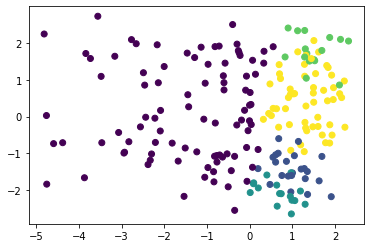

In [ ]:
#3. Visualize the data in reduced feature space
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
import matplotlib.pyplot as plt
import seaborn as sns
LDA = lda(n_components=2)
X_LDA = LDA.fit_transform(X,y)

plt.scatter(X_LDA[:,0], X_LDA[:,1], c = y)

In [ ]:
#4. Construct the pipeline of model training using LogisticRegression for multicalss classification.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression())

pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.500


In [ ]:
pipe_lr = make_pipeline(StandardScaler(),
                        lda(n_components=3),
                        LogisticRegression())
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.925


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')


CV accuracy scores: [0.9375 0.8125 0.9375 0.8125 0.75   0.875  0.875  0.8125 0.875  1.    ]
CV accuracy: 0.869 +/- 0.071


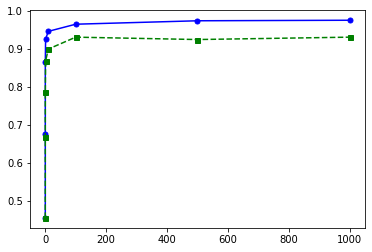

In [ ]:
#5. Finetune model hyperparameters if any.
from sklearn.model_selection import validation_curve
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 500.0, 1000.0]
train_scores, test_scores = validation_curve(
                estimator=pipe_lr,
                X=X_train,
                y=y_train,
                param_name='logisticregression__C',
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
plt.plot(param_range, train_mean,
         color='blue', marker='o',
         markersize=5, label='Training accuracy')
plt.plot(param_range, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='Validation accuracy')

From graph, the best C parameter is 100 because it produces high accuracy with the highest test validation score as well.

In [ ]:
#6. Evaluate model performance
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda
pipe_lr = make_pipeline(StandardScaler(),
                        lda(n_components=3),
                        LogisticRegression(penalty='l2',C =100,random_state=0))
pipe_lr.fit(X_train, y_train)
y_pred = pipe_lr.predict(X_test)
test_acc = pipe_lr.score(X_test, y_test)
print(f'Test accuracy: {test_acc:.3f}')

Test accuracy: 0.925


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.


In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print(f'CV accuracy scores: {scores}')
print(f'CV accuracy: {np.mean(scores):.3f} '
      f'+/- {np.std(scores):.3f}')

CV accuracy scores: [0.9375 1.     1.     0.875  0.8125 0.875  0.875  0.9375 1.     1.    ]
CV accuracy: 0.931 +/- 0.065
